## 1.Look up SMOTE oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html .

  - a. Describe what it is in your own words in markdown.
  - b. Use this technique with the diabetes dataset. Comment on the model performance compared to other methods.


### What is SMOTE Oversampling
- SMOTE - Synthetic Minority Over-Sampling Technique
- SMOTE is a oversampling technique to balance the dataset by making minority and majority classes ratio balanced.
- SMOTE creates artificial/synthetic data/records using the nearest neighbor method. It creates data between the nearest neighbor.
    - SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
    - Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
    - The approach creates new synthetic examples from the minority class that are relatively close in feature space to existing examples from the minority class.


- In below example non-diabetic is 500 and diabetic is 268, there is a imbalance in the data set
- non-diabetic is a majority class and diabetic is a minority class
- SMOTE will create new artifical data between the neartest neighor of the data points present in the minority class.


### SMOTE on diabetes dataset

- We have done logistic regression model without oversampling method and got recall of 0.84 and accuracy 0.72
- Using SMOTE oversampling techniques following results are acchieved
    - Comparing it with logistic regression without ovesampling, accuracy score went a little bit up from 0.72 to 0.74 but recall value dropped from 0.84 to 0.74.

In [7]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE 
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [43]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns= None

In [8]:
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Feature selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X2 = diabetes_df.drop(["Outcome"],axis=1)
y2 = diabetes_df["Outcome"]

model = LinearRegression()

#Initializing RFE model
rfe = RFE(model, 7)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X2,y2)  

#Fitting the data to model
model.fit(X_rfe,y2)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True]
[1 1 1 2 1 1 1 1]


In [44]:
rfe_features = X2.columns[np.where(rfe.support_ == True)[0]]
print(rfe_features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [45]:
X = diabetes_df[rfe_features]
y = diabetes_df['Outcome']

In [46]:
#There is a imbalance in dataset
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [67]:
#Split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42,stratify=y)


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.fit_transform(X_test)

In [79]:
from collections import Counter
sm = SMOTE(sampling_strategy=1.0,random_state=42)   # Find out best ratio to get optimum performance
X_res, y_res = sm.fit_resample(X_train_scaler, y_train)
print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_res))

original dataset shape: Counter({0: 400, 1: 214})
Resample dataset shape Counter({0: 400, 1: 400})


In [69]:
#Logistic regression
lregmodel = LogisticRegression(random_state=42)
lregmodel.fit(X_res,y_res)


LogisticRegression(random_state=42)

In [70]:
#Calculate accuracy
from sklearn.metrics import balanced_accuracy_score
y_pred = lregmodel.predict(X_test_scaler)
balanced_accuracy_score(y_test,y_pred)

0.741111111111111

In [72]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[76, 24],
       [15, 39]], dtype=int64)

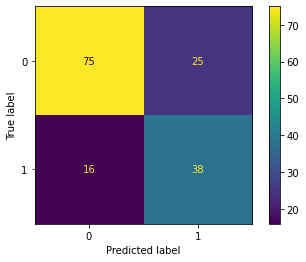

In [58]:
plot_confusion_matrix(lregmodel,X_test_scaler,y_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.62      0.72      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [59]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.75      0.70      0.79      0.73      0.53       100
          1       0.60      0.70      0.75      0.65      0.73      0.53        54

avg / total       0.75      0.73      0.72      0.74      0.73      0.53       154



## 2. Create a list of preprocessing steps you should try when working to build a model. Work with your group to come up with the most comprehensive list you can.
 
 - Handling null values
     - drop the features that has most null values,
     - fill the  null values based on skew and central tendency - mean or median
 - feature engineering
     - creating new columns from the columns that have combined values e.g date can be separated in day, month and year
 - feature selection 
     - using correlation matrix
     - RFE
 - remove extreme outliers
     - use box plot to detect outliers
 - Standardization/Normalization
     - Using StandardScaler from sklearn
 - One hot encoding 
     - pandas getdummies
 - Categorical to numerical 
     - LabelEncoder
 - handling multicollinearity
 - dimentinality reduction
 - converting data types


##  In class - warm up activity- Write a list comprehension that puts all the even values from 1-1000 in a list. Create a new list from that list that has only the values with an 8 in them

In [60]:
even_values = [x for x in range(1,1001) if x % 2 == 0]
print(even_values)
with_8 = [val for val in even_values if "8" in str(val) ]
print(with_8)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 376, 378, 380, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 42